## Discrete Distributions

Until now we have been looking at experiments (games) where the outcome of the game is uncertain and have seen how we can calculate
probabilities of events associated with these games. For example, we counted the number of ways to get a sum greater than 10 when rolling two dice (@exr-simulation-dice-rolls),
assumed a probability model for the dice rolls (equally likely outcomes), and calculated the probability of the event of interest.

In this section, we will look at functions that map the outcomes of an experiment to a real number. For simplicity, consider an experiment of tossing two coins and a game where you win 2 EUR for every head. In this game your payoff is a function of the outcome of the experiment and so you can compute the probability of winning a given amount of money. 

The sample space of the experiment is 

$$
\Omega = \{HH, HT, TH, TT\}
$$

where H denotes heads and T denotes tails. Let $w$ be an outcome in the sample space $\Omega$. The payoff function $X(w)$ is defined as follows:

$$
X(\omega) = \begin{cases}
0 & \text{if } \omega = TT \\
2 & \text{if } \omega = HT \text{ or } \omega = TH \\
4 & \text{if } \omega = HH
\end{cases}
$$

If we equip the sample space with a probability model, we can compute the probability of winning 0, 1, or 2 EUR. Let's assume that the outcomes are equally likely (our probability model), so that the probability of each outcome in $\Omega$ is $1/4$. Then the probability of winning nothing is

$$
P(X = 0) = P(\{TT\}) = \frac{1}{4}
$$

the probability of winning 2 EUR is

$$
P(X = 4) = P(\{HH\}) = \frac{1}{4}
$$

and the probability of winning 1 EUR is

$$
P(X = 2) = P(\{HT, TH\}) = \frac{2}{4} = \frac{1}{2}
$$

With these three probabilities we have a complete description of this game. We call the function $f(x)$ that maps the possible payoffs to their probabilities the **probability mass function** (PMF) of the random variable $X$. In this case, the PMF is very simple:

$$
f(x) = \begin{cases}
\frac{1}{4} & \text{if } x = 0 \\
\frac{1}{2} & \text{if } x = 2 \\
\frac{1}{4} & \text{if } x = 4 \\
0 & \text{otherwise}
\end{cases}
$$


Text(0, 0.5, 'Probability')

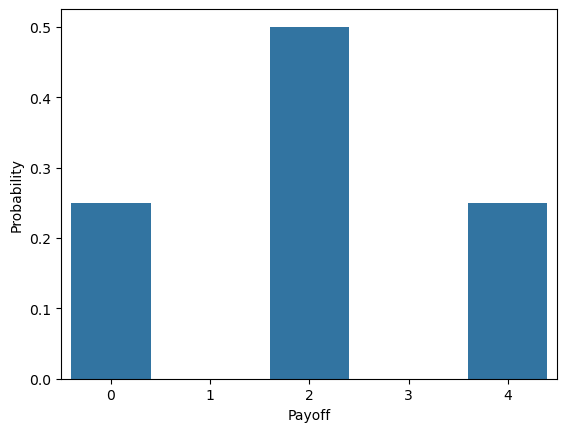

In [2]:
#| label: fig-coins-pmf-plot
#| caption: Plot of the probability mass function of the payoff of the coin game.

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=[0, 1, 2, 3, 4], y=[1/4, 0, 1/2, 0, 1/4])
plt.xlabel('Payoff')
plt.ylabel('Probability')

In [3]:
# Simulate the game

import numpy as np

# We use 0 to represent heads and 1 to represent tails
coins_game = np.random.choice([0, 1], size=[1000, 2])

In [4]:
# The payoff is equal to the sum of the 0s and 1s in each row (game) times 2
payoff = 2 * np.sum(coins_game, axis=1)

Text(9.444444444444445, 0.5, 'Proportions')

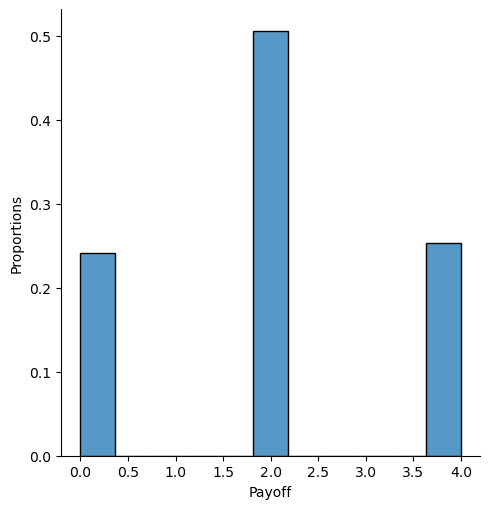

In [5]:
#| label: fig-coins-epmf-simulated
#| caption: Empirical probability mass function of the payoff of the coin game.

sns.displot(x=payoff, stat='probability')

plt.xlabel('Payoff')
plt.ylabel('Proportions')

## Probability Mass Function

:::{#def-pmf}
## Probability Mass Function

For a discrete random variable $X$, the probability mass function (PMF) maps each possible value of $X$ to its probability. The PMF is denoted by $f(x)$ and satisfies the following properties:

1. $f(x) \geq 0$ for all $x$.
2. $\sum_{x} f(x) = 1$.

:::

:::{#exr-pmf-binomial-1}
## The Binomial Distribution (1)

Consider an experiment where you toss a coin $3$ times independently. Write down the sample space $\Omega$ as a set of sequences (e.g., $HHH$ for three heads). Let $X$ be the random variable that counts the number of heads in the sequence. Write down the PMF of $X$.

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The sample space is

$$
\Omega = \{HHH, HHT, HTH, HTT, THH, THT, TTH, TTT\}
$$

and has $2^3 = 8$ elements. The random variable $X$ is defined as the number of heads in the sequence. Under a probability model of equally likely outcomes the PMF of $X$ is

$$
f(x) = \begin{cases}
\frac{1}{8} & \text{if } x = 0 \\
\frac{3}{8} & \text{if } x = 1 \\
\frac{3}{8} & \text{if } x = 2 \\
\frac{1}{8} & \text{if } x = 3 \\
0 & \text{otherwise}
\end{cases}
$$

Before we move on, let's look at the counting argument that leads to this PMF. We have obtained the PMF by counting the number of sequences that have $x$ heads and summing their probabilities (because they are disjoint events). For example, the probability of getting 1 head is the sum of the probabilities of the sequences $HTT$, $THT$, and $TTH$. We can generalize this by asking the following questions:

1. How many sequences of length 3 have no heads?

- There are 3! ways to arrange the heads and tails in the sequence.
- The order of the heads does not matter, so we divide by $0!$.
- The order of the tails does not matter and if the sequence has no heads, it must have $3 - 0 = 3$ tails. So we divide by $3!$.

Therefore, the number of sequences with no heads is

$$
\binom{3}{0} = \frac{3!}{0!3!} = 1
$$

2. How many sequence of length 3 have one head?

- There are 3! ways to arrange the heads and tails in the sequence.
- The order of the heads does not matter, so we divide by $1!$.
- The order of the tails does not matter and if the sequence has one head, it must have $3 - 1 = 2$ tails. So we divide by $2!$.

Therefore, the number of sequences with one head is

$$
\binom{3}{1} = \frac{3!}{1!2!} = 3
$$

3. How many sequences of length 3 have two heads?

- There are 3! ways to arrange the heads and tails in the sequence (as before).
- The order of the heads does not matter, so we divide by $2!$.
- The order of the tails does not matter and if the sequence has two heads, it must have $3 - 2 = 1$ tail. So we divide by $1!$.

Therefore, the number of sequences with two heads is

$$
\binom{3}{2} = \frac{3!}{2!1!} = 3
$$

4. How many sequences of length 3 have three heads?

- There are 3! ways to arrange the heads and tails in the sequence (as before).
- The order of the heads does not matter, so we divide by $3!$.
- The order of the tails does not matter and if the sequence has three heads, it must have $3 - 3 = 0$ tails. So we divide by $0! = 1$.

Therefore, the number of sequences with three heads is

$$
\binom{3}{3} = \frac{3!}{3!0!} = 1
$$

:::

:::{#def-binomial-equally likely}
## The Binomial Distribution (2)

Consider a similar experiment as in @exr-pmf-binomial-1 but this time you toss the coin not 3 but $n$ times independently. A random variable $X$ counts the number of heads in each sequence. Under a fair coin model all sequences in the sample space $\Omega$ are equally likely. Write down the PMF of $X$.

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The sample space consists of all sequences of length $n$ with heads and tails. There are $2^n$ elements in the sample space. 

$$
\Omega = \{(e_1, e_2, \ldots, e_n) | e_i \in \{H, T\}, i = 1,\ldots n \}
$$

The random variable $X$ counts the number of heads in each sequence. As all sequences are equally likely and the outcomes are mutually exclusive, we obtain the PMF of $X$ by counting the number of sequences with $x$ heads and dividing by the total number of sequences.

As in the exercise @exr-pmf-binomial-1, consider a sequence of length $n$ with $x$ heads.

- There are $n!$ ways to arrange the heads and tails in the sequence.
- The order of the heads does not matter, so we divide by $x!$.
- The order of the tails does not matter and if the sequence has $x$ heads, it must have $n - x$ tails. So we divide by $(n - x)!$.

Therefore, the number of sequences with $x$ heads is

$$
\binom{n}{x} = \frac{n!}{x!(n - x)!}
$$

The probability of each sequence is $1/2^n$ and so the PMF of $X$ is

$$
f(x) = \binom{n}{x} \left(\frac{1}{2}\right)^n
$$
:::


:::{#exr-pmf-binomial}
## The Binomial Distribution

In this exercise we will again consider a coin tossing experiment where you toss a coin $n$ times independently, but this time the coin will not be fair. Instead the probability of getting a head is $p$ and the probability of getting a tail is $1 - p$. Write down the PMF of the random variable $X$ that counts the number of heads in each sequence.

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

As in the previous two examples the sample space consists of all sequences of length $n$ with heads and tails. For a sequence of length $n$ with $x$ heads, the number of sequences is

$$
\binom{n}{x}
$$

The only difference is that the sequences are not equally likely anymore. We still assume that the tosses are independent.

Because of independence, the probability of a sequence with $x$ heads is

$$
p^x (1 - p)^{n - x}
$$

The PMF of $X$ is then

$$
f(x) = \binom{n}{x} p^x (1 - p)^{n - x}
$$



Text(0, 0.5, 'Probability')

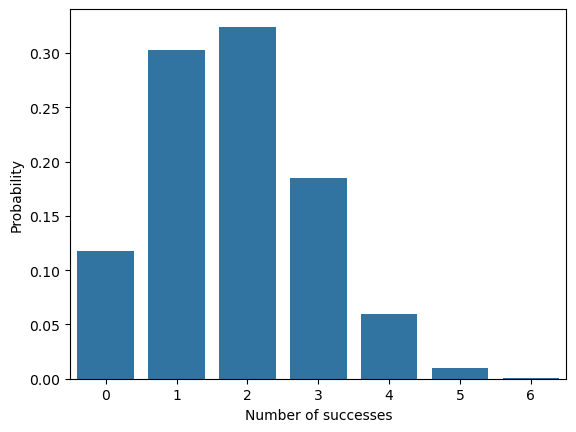

In [6]:
#| label: fig-binomial-pmf-plot
#| fig-cap: Plot of the probability mass function of the binomial distribution with parameters n=6 and p=0.3.
import numpy as np
from scipy.stats import binom

x = np.arange(0, 7)
y = binom.pmf(x, n=6, p=0.3)

sns.barplot(x=x, y=y)
plt.xlabel('Number of successes')
plt.ylabel('Probability')


Text(0.5694444444444446, 0.5, 'Proportions')

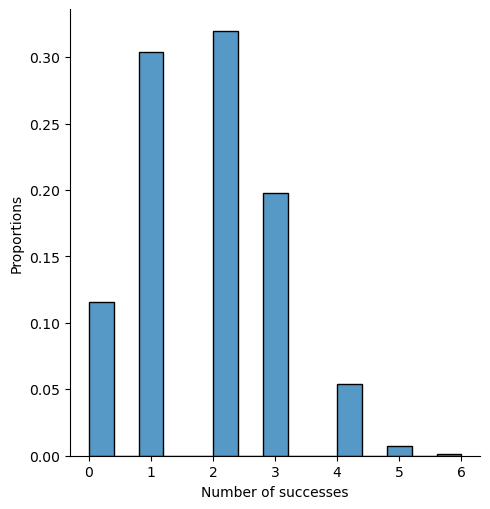

In [7]:
# Simulate the binomial distribution with n=6 and p=0.3

binomial = np.random.binomial(n=6, p=0.3, size=1000)

#| label: fig-binomial-epmf-simulated
#| caption: Empirical probability mass function of the binomial distribution with parameters n=6 and p=0.3.

sns.displot(x=binomial, stat='probability')
plt.xlabel('Number of successes')
plt.ylabel('Proportions')


## Cumulative Distribution Function

The probability mass function (PMF) of a random variable $X$ gives the probability of each possible value of $X$. The cumulative distribution function (CDF) of $X$ gives the probability that $X$ is less than or equal to a given value $x$.

:::{#def-cdf}
## Cumulative Distribution Function

For a discrete random variable $X$, the cumulative distribution function (CDF) is defined as

$$
F(x) = P(X \leq x) = \sum_{y \leq x} f(y)
$$

where $f(y)$ is the PMF of $X$ and the sum runs over all possible values of $y$ that are less than or equal to $x$.

:::

:::{#exr-cdf}
## Properties of the CDF

Consider a discrete random variable $X$ with PMF $f(x)$ and CDF $F(x)$. Show that the CDF satisfies the following properties:

1. $F(x)$ is non-decreasing.
2. $F(x) \in [0, 1]$ for all $x$.
3. $\lim_{x \to -\infty} F(x) = 0$ and $\lim_{x \to \infty} F(x) = 1$.
4. $P(a < X \leq b) = F(b) - F(a)$ for all $a < b$.
5. $P(X = x) = F(x) - F(x - 1)$ for all $x$.
:::

:::{#exr-cdf-coins}
## CDF of the Coin Tossing Game

Consider our introductory example of the coin tossing game where you win 2 EUR for every head. Write down the CDF of the random variable $X$ that counts the amount of money you win and use it to calculate the following probabilities:

1. The probability of winning between 1.5 and 3 EUR (inclusive).
2. The probability to win more than 2.5 EUR.
3. The probability of winning between 2 and 6 EUR (inclusive).

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The PMF of $X$ is

$$
f(x) = \begin{cases}
\frac{1}{4} & \text{if } x = 0 \\
\frac{1}{2} & \text{if } x = 2 \\
\frac{1}{4} & \text{if } x = 4 \\
0 & \text{otherwise}
\end{cases}
$$

The CDF of $X$ is

$$
F(x) = \sum_{y \leq x} f(y)
$$

$$
F(x) = \begin{cases}
0 & \text{if } x < 0 \\
\frac{1}{4} & \text{if } 0 \leq x < 2 \\
\frac{3}{4} & \text{if } 2 \leq x < 4 \\
1 & \text{if } x \geq 4
\end{cases}
$$

The probability of winning between 1.5 and 3 EUR is

$$
P(1.5 \leq X \leq 3) = F(3) - F(1.5) + P(X = 1.5) = \frac{3}{4} - \frac{1}{4} + 0 = \frac{1}{2}
$$

The probability of winning more than 2.5 EUR is

$$
P(X > 2.5) = 1 - P(X \leq 2.5) = 1 - F(2.5) = 1 - \frac{3}{4} = \frac{1}{4}
$$

The probability of winning between 2 and 6 EUR is

$$
P(2 \leq X \leq 6) = F(6) - F(2) + P(X = 2) = 1 - \frac{3}{4} + 0 = \frac{1}{4}
$$




Text(0, 0.5, 'Proportion of games with payoff less than or equal to x')

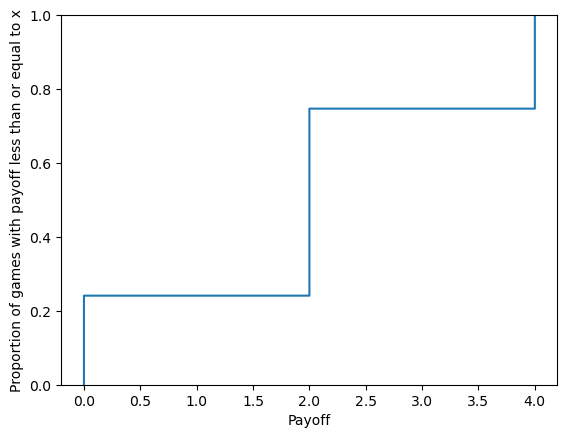

In [8]:
#| label: fig-coins-cdf-plot
#| fig-cap: Plot of the cumulative distribution function of the payoff of the coin game.

sns.ecdfplot(x=payoff)
plt.xlabel('Payoff')
plt.ylabel('Proportion of games with payoff less than or equal to x')


## Exercises

The statistical modeling of waiting times (e.g. number of hours or weeks until some event occurs) forms an important part of the applied work in statistics. Consider some examples:

- The number of days until a customer makes a purchase.
- The number of weeks until a machine breaks down.
- The number of hours until a light bulb burns out.

Assuming that these events may occur in every period with a fixed probability and assuming independence between the periods, all of these examples  

:::{#exr-geometric-distribution}
## Coin Tossing until the First Head

You toss a biased coin with probability of getting a head $p$. Assume that the tosses are independent. The random variable $X$ counts the number of tosses until the first head. Write down the PMF and CDF of $X$. Compute the following probabilities:

- The probability of getting a head on the first toss.
- The probability of waiting at least 3 tosses until the first head (for $p = 0.2$).
- The probability of waiting between 2 and 4 tosses until the first head (for $p = 0.2$).

:::
:::{.callout-info collapse="true"}
## Hint: Geometric Series (click to expand)

In the derivation of the CDF you will need an expression for the partial sum of a geometric series. The sum of the first $n$ terms of a geometric series is:

$$
\sum_{k = 0}^{n} r^k = \frac{1 - r^{n + 1}}{1 - r}, \quad r \neq 1
$$

where $r$ is the common ratio of the series. In this case, the common ratio is $1 - p$.

It is easy to show why the above equation holds:

$$
\begin{align*}
S_n &= 1 + r + r^2 + \ldots + r^{n - 1} + r^{n} \\
rS_n &= r + r^2 + \ldots + r^{n} + r^{n + 1} \\
\end{align*}
$$

Subtracting the second equation from the first gives

$$
S_n - rS_n = 1 - r^{n + 1} \Rightarrow S_n = \frac{1 - r^{n + 1}}{1 - r}
$$

:::

In [ ]:
# Check it with numpy

pwr = np.array([0, 1, 2, 3, 4, 5])
series = 0.5 ** pwr
series

array([1.     , 0.5    , 0.25   , 0.125  , 0.0625 , 0.03125])

In [11]:
# Look at the partial sums

np.cumsum(series)

array([1.     , 1.5    , 1.75   , 1.875  , 1.9375 , 1.96875])

In [12]:
# Compare these to the result obtained using the formula

(1 - 0.5 ** (pwr + 1)) / (1 - 0.5)

array([1.     , 1.5    , 1.75   , 1.875  , 1.9375 , 1.96875])

:::{#exr-rare-events}
## The Number of Rare Events

Show that the following function is a valid PMF for a discrete random variable $X$ with values in the set $\{0, 1, 2, \ldots\}$ and parameter $\lambda > 0$:

$$
f(k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \ldots
$$

Use $\lambda = 2$ and compute the probabilities of $X$ taking the values 0 and 2.

:::

:::{.callout-note collapse="true"}
## Hint (click to expand)

Use the fact that 

$$
e^{\lambda} = \frac{\lambda^{0}}{0!} + \frac{\lambda^{1}}{1!} + \frac{\lambda^{2}}{2!} + \frac{\lambda^{3}}{3!} + \ldots
$$

:::

:::{#exr-binomial-poisson}
## Another Birthday Problem

You are sitting in a room with 1000 people. Assume that each person has a birthday that is uniformly distributed over the 365 days of the year and that the birthdays are independent (disregard the 29th of February for simplicity). Let $X$ be the number of people in the room that share a birthday with you. Write down the PMF of $X$ and compute the probability of sharing a birthday with exactly one other person.

:::